In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
import cufflinks as cf

%matplotlib inline

In [37]:
plt.style.use("seaborn-whitegrid")
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
# link pyo with notebook via CF
pyo.init_notebook_mode(connected=True)
cf.go_offline()

## Import the dataset

In [4]:
world_df = pd.read_csv(r"./data/covid_19_data_world.csv", index_col=0)
world_df.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [5]:
world_df.rename(columns={'ObservationDate':'Date',
                  'Country/Region':'Country'}, inplace = True)

In [6]:
world_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172480 entries, 1 to 172480
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            172480 non-null  object 
 1   Province/State  124597 non-null  object 
 2   Country         172480 non-null  object 
 3   Last Update     172480 non-null  object 
 4   Confirmed       172480 non-null  float64
 5   Deaths          172480 non-null  float64
 6   Recovered       172480 non-null  float64
dtypes: float64(3), object(4)
memory usage: 10.5+ MB


In [7]:
world_df.isna().sum()

Date                  0
Province/State    47883
Country               0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [8]:
world_df.groupby('Country').sum()

,Confirmed,Deaths,Recovered
Country,,,
Azerbaijan,1.0,0.0,0.0
"('St. Martin',)",2.0,0.0,0.0
Afghanistan,7244619.0,246059.0,5014275.0
Albania,2432707.0,61695.0,1304302.0
Algeria,8216852.0,311474.0,5574987.0
...,...,...,...
Western Sahara,2221.0,195.0,1704.0
Yemen,331991.0,94036.0,188162.0
Zambia,1961175.0,43692.0,1784758.0


In [9]:
world_df['Country'] = world_df['Country'].str.replace('[\',\(,\)]', '')

In [10]:
world_df.groupby('Country').sum()

,Confirmed,Deaths,Recovered
Country,,,
Azerbaijan,1.0,0.0,0.0
Afghanistan,7244619.0,246059.0,5014275.0
Albania,2432707.0,61695.0,1304302.0
Algeria,8216852.0,311474.0,5574987.0
Andorra,494253.0,13476.0,380098.0
...,...,...,...
Western Sahara,2221.0,195.0,1704.0
Yemen,331991.0,94036.0,188162.0
Zambia,1961175.0,43692.0,1784758.0


In [11]:
world_df[world_df['Country']=='St. Martin']

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
4412,03/09/2020,NaN,St. Martin,2020-03-09T10:43:06,2.0,0.0,0.0
4675,03/10/2020,NaN,St. Martin,2020-03-10T05:33:02,2.0,0.0,0.0


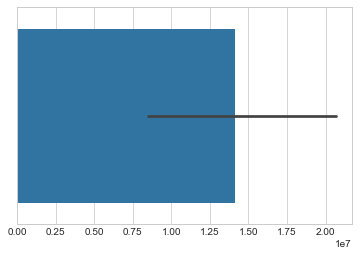

In [12]:
sns.barplot(world_df.groupby('Country').sum())

In [13]:
world_df.groupby('Country').sum().index

Index([' Azerbaijan', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       ...
       'Vanuatu', 'Vatican City', 'Venezuela', 'Vietnam', 'West Bank and Gaza',
       'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe',
       'occupied Palestinian territory'],
      dtype='object', name='Country', length=225)

<BarContainer object of 225 artists>

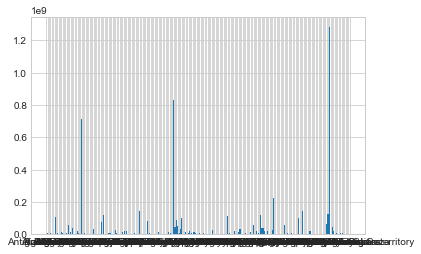

In [14]:
plt.bar(world_df.groupby('Country').sum().index, world_df.groupby('Country').sum()['Confirmed'])

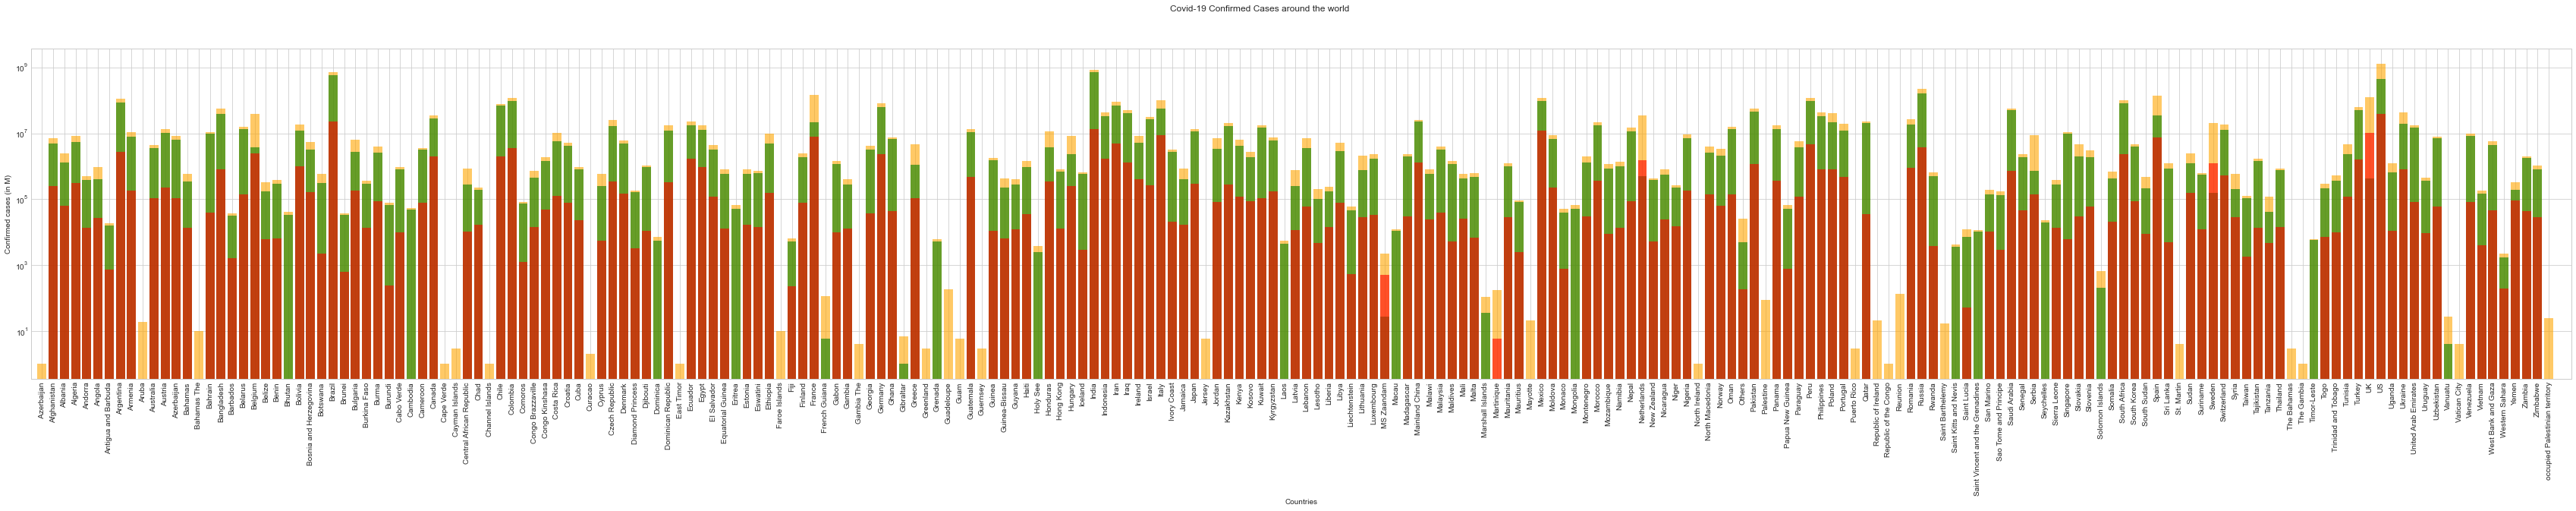

In [15]:
fig, ax = plt.subplots(figsize=(60,8))
ax.bar(world_df.groupby('Country').sum().index, world_df.groupby('Country').sum()['Confirmed'], color='orange', alpha=0.6)
ax.bar(world_df.groupby('Country').sum().index, world_df.groupby('Country').sum()['Recovered'], color='green', alpha=0.6)
ax.bar(world_df.groupby('Country').sum().index, world_df.groupby('Country').sum()['Deaths'], color='red', alpha=0.6)

ax.set_yscale('log')

fig.suptitle("Covid-19 Confirmed Cases around the world")
ax.set_ylabel("Confirmed cases (in M)")
ax.set_xlabel("Countries")
plt.xticks(rotation=90)
plt.xlim([-1,world_df.groupby('Country').sum().index.size+1])
fig.savefig(r"bar-graph.jpg")

In [16]:
world_df.groupby('Country').sum().index.size

225

## Using Plotly


In [17]:
world_date = world_df.groupby('Date').sum()
world_date.reset_index(inplace=True)

In [18]:
world_date.iplot(kind='line', x='Date', y=['Recovered', 'Deaths' ,'Confirmed'])

# Making predictions using fbprophet

In [19]:
from fbprophet import Prophet

In [20]:
# Converting the data to the correct YYYY-MM-DD format

world_date['Date'] = pd.to_datetime(world_date['Date'])

In [21]:
# Splitting the w.r.t the required labels

# 1. Confirmed

confirmed = world_date[['Date','Confirmed']]
confirmed.columns = ['ds','y']

# 2. Deaths

deaths = world_date[['Date','Deaths']]
deaths.columns = ['ds','y']

# 3. Recovered

recovered = world_date[['Date','Recovered']]
recovered.columns = ['ds','y']

In [22]:
confirmed

,ds,y
0,2020-01-22,555.0
1,2020-01-23,653.0
2,2020-01-24,941.0
3,2020-01-25,1438.0
4,2020-01-26,2118.0
...,...,...
315,2020-12-02,64530517.0
316,2020-12-03,65221040.0
317,2020-12-04,65899441.0
318,2020-12-05,66540034.0


In [23]:
model = Prophet(interval_width=0.95)

In [25]:
model.fit(confirmed)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
future = model.make_future_dataframe(periods=300)
confirmed_forecast = model.predict(future)

In [41]:
confirmed_forecast = confirmed_forecast[['ds', 'yhat_lower', 'yhat_upper', 'yhat']]

In [42]:
confirmed_forecast

,ds,yhat_lower,yhat_upper,yhat
0,2020-01-22,-969762.91,810882.78,-63006.01
1,2020-01-23,-952909.40,871049.95,-35332.10
2,2020-01-24,-904700.50,885615.73,893.66
3,2020-01-25,-942378.42,998184.82,10150.06
4,2020-01-26,-926804.09,933793.74,-11952.45
5,2020-01-27,-968388.59,847629.02,-63970.02
6,2020-01-28,-936358.55,884731.07,-61813.69
7,2020-01-29,-960552.26,874198.31,-36206.37
8,2020-01-30,-834233.47,846024.80,-8532.46
9,2020-01-31,-899564.74,895739.14,27693.30


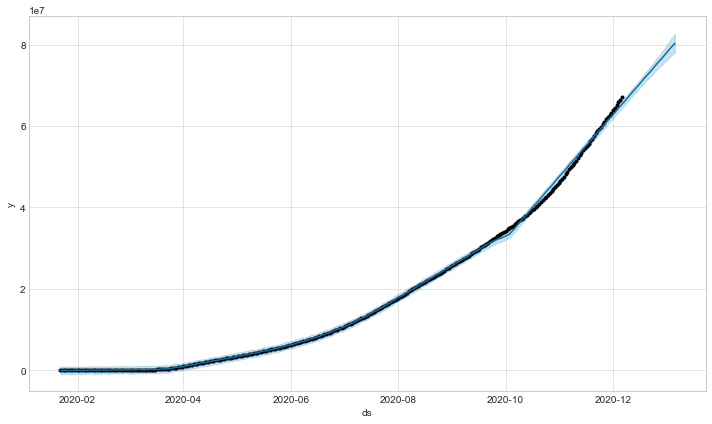

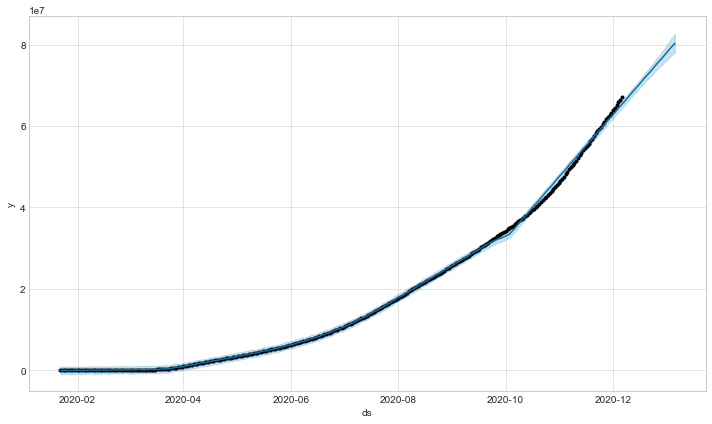

In [39]:
model.plot(confirmed_forecast)

In [49]:
# model.plot_components(confirmed_forecast)

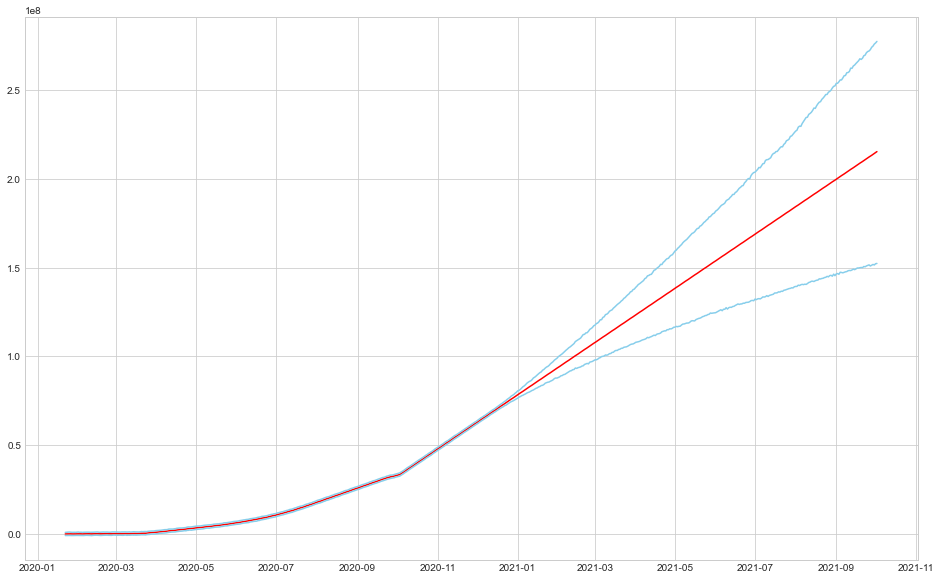

In [61]:
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(confirmed_forecast.ds, confirmed_forecast.yhat, color="red")
ax.plot(confirmed_forecast.ds, confirmed_forecast.yhat_upper, color="skyblue")
ax.plot(confirmed_forecast.ds, confirmed_forecast.yhat_lower, color="skyblue");

In [65]:
plot = confirmed_forecast.iplot(kind='line', x='ds')